# **Lab #8. Time Series Visualization**
This lecture material was prepared by Youngji Koh and Hansoo Lee
. 

## Learning objectives

Today, we will learn about **how to handle and visualize time series data** 
and **how to add interactivity**. 

# **What is Time Series Data?** 

Before we talk about time series data, let's first explain the **temporal data**. Temporal data is simply data that depends on time and where time is recorded explicitly.
For example, suppose we have a dataset that has records of the rate of ice melting over the last five years in Greenland. 

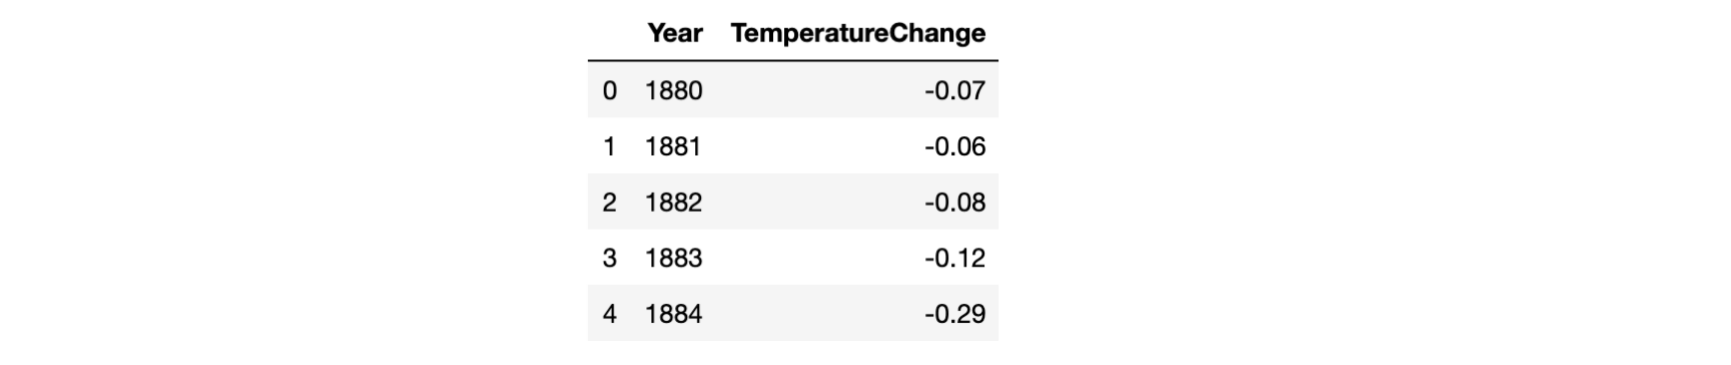

**Time series data** is a more refined version of temporal data where **observations are taken at equally spaced points** in time successively. With temporal data, on the other hand, observations are simply attached to time, and the intervals may not be equally spaced. Time series data is a subset of temporal data.

# **Date/Time Manipulation in Pandas**



We will use pandas library to handle time series data. Pandas is the most common library for importing, wrangling, and analyzing data. For time series data, we'll use a built-in datetime function that supports time-series analysis and visualization. 

Here are the common date/time manipulation techniques or functions in pandas that can be used during analysis and visualization: [Time series/ data functionality](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html)



![대체 텍스트](https://drive.google.com/uc?id=1HY1BGmamhxCbDIdkeJ1tB2YvytXTsx2f)

 * **Date times**: Date time can convert a str object to a datetime object.  It supports various types of date/time formats. It is similar to **datetime.datetime** from the standard library.

In [50]:
import pandas as pd 
pd.to_datetime(['2021/09/20', '2021.10.31']) 

DatetimeIndex(['2021-09-20', '2021-10-31'], dtype='datetime64[ns]', freq=None)

* **Time deltas**: Time delta can calculate an absolute time duration. It can be used to add or subtract specific time values from a datetime column. It is similar to **datetime.timedelta** from the standard library.

In [51]:
import numpy as np
# week_delta arranged over week period, we can add these dates.
week_delta = pd.to_timedelta(np.arange(5), unit='w')
dates = pd.to_datetime(['9/9/2021', '9/9/2021', '9/9/2019', '9/9/2021', '9/9/2021']) 
print(dates + week_delta) 

DatetimeIndex(['2021-09-09', '2021-09-16', '2019-09-23', '2021-09-30',
               '2021-10-07'],
              dtype='datetime64[ns]', freq=None)


* **Time spans**: Time span represented by Period can be specified explicitly, or inferred from the datetime string format.

In [52]:
print(pd.Period('2021-11-04', freq='M'))
print(pd.Period('2021-11'))

2021-11
2021-11


* **Date offsets**: Date offset is the relative time duration with respect to calendar arithmetic. For example, pd.DateOffset(days=1) increments a date by 1 calendar day (23, 24, or 25 hours depending on [daylight savings time](https://en.wikipedia.org/wiki/Daylight_saving_time)) while pd.Timedelta(days=1) increments a date by 24 hours.



In [53]:
# This particular day contains a day light savings time transition
ts = pd.Timestamp("2016-10-30 00:00:00", tz="Europe/Helsinki")
print('Timestamp (Europe/Helsinki): ', ts)
# Convert datetime to UTC
print('Timestamp (UTC): ', ts.tz_convert('UTC'))

# Respects absolute time
print("\n\nAbsoulute time: ")
absolute_time = ts + pd.Timedelta(days=1)
print('Timestamp (Europe/Helsinki): ', absolute_time)
print('Timestamp (UTC): ', absolute_time.tz_convert('UTC'))

# Respects calendar time
print("\n\nCalendar time: ")
calendar_time = ts + pd.DateOffset(days=1)
print('Timestamp (Europe/Helsinki): ', calendar_time)
print('Timestamp (UTC): ', calendar_time.tz_convert('UTC'))

Timestamp (Europe/Helsinki):  2016-10-30 00:00:00+03:00
Timestamp (UTC):  2016-10-29 21:00:00+00:00


Absoulute time: 
Timestamp (Europe/Helsinki):  2016-10-30 23:00:00+02:00
Timestamp (UTC):  2016-10-30 21:00:00+00:00


Calendar time: 
Timestamp (Europe/Helsinki):  2016-10-31 00:00:00+02:00
Timestamp (UTC):  2016-10-30 22:00:00+00:00


# **Resampling**

Temporal data varies in units of time, such as millisecond, second, hour, and day. Sometimes, we need to increase or decrease the time unit. Pandas has a convenience method for frequency conversion, or resampling of time series. 

## Toy Example

Let's aggregate or summarize time series data by 10-minute interval with the [resample()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) method.

![대체 텍스트](https://drive.google.com/uc?id=19Cu7y9iT6NPFefoat3YMkSZO41BrzcIJ)

1. Let's create a simple time series data. It consists of two columns, price and quantity, with a timestamp consisting of **year-month-day time: minute: second** as index. We can create data range in 2-minuite interval (freq ='2min') by using **pd.date_range (from, to, freq)**. 

In [54]:
import pandas as pd
import numpy as np

# Generate time series index
range = pd.date_range('2019-12-19', '2019-12-20', freq='2min')
df = pd.DataFrame(index = range)[:20]

# Add 'price' columm using random number
np.random.seed(seed=1004) # for reproducibility
df['price'] = np.random.randint(low=10, high=100, size=20)

# Add 'amount' column unsing random number
df['amount'] = np.random.randint(low=1, high=5, size=20)

print('Shape of df DataFrame:', df.shape)
df

Shape of df DataFrame: (20, 2)


,price,amount
2019-12-19 00:00:00,12,4
2019-12-19 00:02:00,21,2
2019-12-19 00:04:00,41,1
2019-12-19 00:06:00,79,4
2019-12-19 00:08:00,61,2
2019-12-19 00:10:00,81,1
2019-12-19 00:12:00,24,3
2019-12-19 00:14:00,62,1
2019-12-19 00:16:00,76,3
2019-12-19 00:18:00,63,1


2. Select the first and last value by 10 minutes time span using the resample method. We can extract time series index at the same interval using **resample()** method. Then, get the first row using first() method, and the last row using last() method.

In [55]:
# Resampling by a given time span: first, last
df_summary = pd.DataFrame()

# resample('10T'): 10 minute interval
# You can use other parameters such as 1 hour('1H'), 1 day('1D'), 1 week('1W') and so on.
df_summary['price_10m_first'] = df.price.resample('10T').first()
df_summary['price_10m_last'] = df.price.resample('10T').last()
df_summary['amount_10m_first'] = df.amount.resample('10T').first()
df_summary['amount_10m_last'] = df.amount.resample('10T').last()

df_summary

,price_10m_first,price_10m_last,amount_10m_first,amount_10m_last
2019-12-19 00:00:00,12,61,4,2
2019-12-19 00:10:00,81,63,1,1
2019-12-19 00:20:00,95,30,2,4
2019-12-19 00:30:00,33,96,1,3


3. Calculate the sum and cumulative sum of data by 10 minutes time span.

In [56]:
# Resampling by a given time span: sum, cumulative sum
df_summary = pd.DataFrame()

df_summary['price_10m_sum'] = df.price.resample('10T').sum()
df_summary['price_10m_cumsum'] = df.price.resample('10T').sum().cumsum()
df_summary['amount_10m_sum'] = df.amount.resample('10T').sum()
df_summary['amount_10m_cumsum'] = df.amount.resample('10T').sum().cumsum()

df_summary

,price_10m_sum,price_10m_cumsum,amount_10m_sum,amount_10m_cumsum
2019-12-19 00:00:00,214,214,13,13
2019-12-19 00:10:00,306,520,9,22
2019-12-19 00:20:00,359,879,11,33
2019-12-19 00:30:00,286,1165,12,45


4. Find the summary statistics by 10 minutes time span. Minimum, maximum, mean, and median can be obtained using the **min(), max(), mean(), and median()** methods, and **range** can be calculated as follows: **range = maximum value - minimum value**.

In [57]:
# Resampling by a given time span: min, max, mean, median, range
df_summary = pd.DataFrame()

df_summary['price_10m_min'] = df.price.resample('10T').min()
df_summary['price_10m_max'] = df.price.resample('10T').max()
df_summary['price_10m_mean'] = df.price.resample('10T').mean()
df_summary['price_10m_median'] = df.price.resample('10T').median()
df_summary['price_10m_range'] = df.price.resample('10T').max() - df.price.resample('10T').min()

df_summary

,price_10m_min,price_10m_max,price_10m_mean,price_10m_median,price_10m_range
2019-12-19 00:00:00,12,79,42.8,41.0,67
2019-12-19 00:10:00,24,81,61.2,63.0,57
2019-12-19 00:20:00,30,95,71.8,82.0,65
2019-12-19 00:30:00,22,96,57.2,58.0,74


5. Calculate the variance and standard deviation by 10 minutes time span. Since there is no method to directly obtain the sample standard deviation, the sample standard deviation is obtained by taking the square root of the sample variance.

In [58]:
# Resampling by a given time span: variance, standard deviation
df_summary = pd.DataFrame()

# sample variance 1/(N-1)*sigma(X-X_bar)^2
df_summary['price_10m_var'] = df.price.resample('10T').var() 

# sample standard deviation using sqrt(var) formula
df_summary['price_10m_stddev'] = np.sqrt(df.price.resample('10T').var())

df_summary

,price_10m_var,price_10m_stddev
2019-12-19 00:00:00,767.2,27.698375
2019-12-19 00:10:00,499.7,22.353971
2019-12-19 00:20:00,624.2,24.983995
2019-12-19 00:30:00,930.7,30.507376


## Dataset: K-EmoPhone dataset

We will use the following time series data: **Accelerometer**, **HeartRate** and  **PhysicalActivityEventEntity**. 

* Accelerometer contains the acceleration value of each axis (X, Y, Z)
* HeartRate contains the number of heart beats per minute and its data collection quality (LOCKED if the value is valid)
* PhysicalActivityEventEntity contains the confidence level of the corresponding activity state (0~1) and the type of the physical activity


![대체 텍스트](https://drive.google.com/uc?id=1GwsyGmM4UJBnWX1VwEqWjwL84I_zOA8f)

Mount a Google Drive by executing the following code. It will ask you to enter an authorization code. Please click the URL to give streaming permission, which will give you an authorization code. Copy that code and paste it in the console pane of this section (after pasting, press 'Enter').

In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. First, download **Accelerometer.csv**, **HeartRate.csv** and **PhysicalActivityEventEntity.csv** files and put those files inside the class folder '/content/drive/My Drive/CS481_Data Visualization/'. We are going to read the csv files in this folder.
2. Load Accelerometer and HeartRate dataset. Then, set timestamp column as the new index because we will merge and resample data along timestamps values. 


In [60]:
import pandas as pd 

# (1) load accelerometer data
accelerometer = pd.read_csv('/content/drive/My Drive/CS481_Data Visualization/Accelerometer.csv')

# (2) set timestamp as a new index
accelerometer.set_index('timestamp', drop=True, inplace=True) 
# drop : Delete columns to be used as the new index (default: True)
# inplace : Modify the DataFrame in place (i.e., do not create a new object) (default: False)

accelerometer.head()

,Y,X,Z
timestamp,,,
1556947980732,-0.838379,-0.376221,-0.352539
1556947980871,-0.837646,-0.374023,-0.354492
1556947981045,-0.806152,-0.365723,-0.358398
1556947981118,-0.828369,-0.382568,-0.364258
1556947981266,-0.828613,-0.375488,-0.364502


In [61]:
# (1) load heart rate data
heartrate = pd.read_csv('/content/drive/My Drive/CS481_Data Visualization/HeartRate.csv') 
 
# (2) set timestamp as a new index
heartrate.set_index('timestamp', drop=True, inplace=True) 

heartrate.head()

,BPM,Quality
timestamp,,
1556947980500,74,ACQUIRING
1556947981478,74,ACQUIRING
1556947982471,74,ACQUIRING
1556947983506,74,ACQUIRING
1556947984460,74,LOCKED


3. We will merge two data (Accelerometer and HeartRate) together and create an aggregate data. Then, create a new column (label information) on the aggregate data. For merging data, we can use [pandas.concat](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html) that concatenate input dataframes along the index of the dataframes.

In [62]:
aggregate_data = pd.concat([accelerometer, heartrate], axis=1, sort=False)
aggregate_data.head()

,Y,X,Z,BPM,Quality
timestamp,,,,,
1556947980732,-0.838379,-0.376221,-0.352539,NaN,NaN
1556947980871,-0.837646,-0.374023,-0.354492,NaN,NaN
1556947981045,-0.806152,-0.365723,-0.358398,NaN,NaN
1556947981118,-0.828369,-0.382568,-0.364258,NaN,NaN
1556947981266,-0.828613,-0.375488,-0.364502,NaN,NaN


4. We will tidy up the aggregate data by dropping unnecessary columns and replacing column names with more comprehensive names. Then, create a new index using pd.to_datetime() function. 

In [63]:
# Drop all unnecessary columns
aggregate_data.drop(columns = ['Quality'], inplace=True) 

# Rename column names
aggregate_data.columns = ['acc_Y','acc_X','acc_Z','BPM']

# Create new_timestamps column and put datatime
aggregate_data['timestamp'] = pd.to_datetime(aggregate_data.index, unit='ms') 

# We still need old_timestamps to label activity type information later 
aggregate_data['old_timestamp'] = aggregate_data.index 

# Set new_timestamps as new index, the previous index will be dropped
aggregate_data.set_index('timestamp', drop=True, inplace=True)
aggregate_data.head()

,acc_Y,acc_X,acc_Z,BPM,old_timestamp
timestamp,,,,,
2019-05-04 05:33:00.732,-0.838379,-0.376221,-0.352539,NaN,1556947980732
2019-05-04 05:33:00.871,-0.837646,-0.374023,-0.354492,NaN,1556947980871
2019-05-04 05:33:01.045,-0.806152,-0.365723,-0.358398,NaN,1556947981045
2019-05-04 05:33:01.118,-0.828369,-0.382568,-0.364258,NaN,1556947981118
2019-05-04 05:33:01.266,-0.828613,-0.375488,-0.364502,NaN,1556947981266


5. Let's create a data with the average value of each column into 300 milliseconds.

In [64]:
# milliseconds: L, ms
K_EmoPhone_300L = aggregate_data.resample('300L').mean()
K_EmoPhone_300L.head()

,acc_Y,acc_X,acc_Z,BPM,old_timestamp
timestamp,,,,,
2019-05-04 05:33:00.300,NaN,NaN,NaN,74.0,1.556948e+12
2019-05-04 05:33:00.600,-0.838013,-0.375122,-0.353516,NaN,1.556948e+12
2019-05-04 05:33:00.900,-0.817261,-0.374146,-0.361328,NaN,1.556948e+12
2019-05-04 05:33:01.200,-0.821655,-0.373047,-0.359375,74.0,1.556948e+12
2019-05-04 05:33:01.500,-0.834147,-0.375570,-0.352946,NaN,1.556948e+12


6. This time, we will load PhysicalActivityEventEntity dataset. Then, group by data along timestamp. If there are multuple rows for same timestamp, leave first row among the multuple rows. 

In [65]:
 # Load PhysicalActivityEventEntity data
activityevent = pd.read_csv('/content/drive/My Drive/CS481_Data Visualization/PhysicalActivityEventEntity.csv')
activityevent

,timestamp,confidence,type
0,1556935327195,1.0,STILL
1,1556935330709,1.0,STILL
2,1556935486870,1.0,STILL
3,1556935490526,1.0,STILL
4,1556935514031,1.0,STILL
...,...,...,...
7637,1557007809130,1.0,STILL
7638,1557007809227,1.0,STILL
7639,1557009205090,1.0,STILL
7640,1557011401456,1.0,STILL


In [66]:
# Group by data along timestamp
# If there are multuple rows for same timestamp, we will leave first row among the multuple rows
activityevent = activityevent.groupby(['timestamp']).first() 

# Set a time range  (start_timestamp ~ end_timestamp)
# start_timestamp: current index, end_timestamp: next index
activityevent['start_timestamp'] = activityevent.index
activityevent['end_timestamp'] = activityevent.index
end_time = activityevent.index.copy()
end_time = end_time[1:]
activityevent = activityevent[:len(activityevent)-1]
activityevent['end_timestamp'] = end_time
activityevent

,confidence,type,start_timestamp,end_timestamp
timestamp,,,,
1556935327195,1.0,STILL,1556935327195,1556935330709
1556935330709,1.0,STILL,1556935330709,1556935486870
1556935486870,1.0,STILL,1556935486870,1556935490526
1556935490526,1.0,STILL,1556935490526,1556935514031
1556935514031,1.0,STILL,1556935514031,1556935686173
...,...,...,...,...
1557006318005,1.0,STILL,1557006318005,1557007809130
1557007809130,1.0,STILL,1557007809130,1557007809227
1557007809227,1.0,STILL,1557007809227,1557009205090


7. The column **type** can be confused with built-in Functions in Python, so replace column names with a more comprehensive name which is **label**. 

In [67]:
activityevent.columns = ['confidence','label', 'start_timestamp', 'end_timestamp']
activityevent.head()

,confidence,label,start_timestamp,end_timestamp
timestamp,,,,
1556935327195,1.0,STILL,1556935327195,1556935330709
1556935330709,1.0,STILL,1556935330709,1556935486870
1556935486870,1.0,STILL,1556935486870,1556935490526
1556935490526,1.0,STILL,1556935490526,1556935514031
1556935514031,1.0,STILL,1556935514031,1556935686173


8. We will label the aggregated data using information in PhysicalActivityEventEntity data. 

In [68]:
# Add label column and put activity type information in the column.
for index, row in activityevent.iterrows():
  start_time = row['start_timestamp']
  end_time = row['end_timestamp']
  label = row['label']

  # df.loc : Access a group of rows and columns
  # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html
  K_EmoPhone_300L.loc[(start_time <= K_EmoPhone_300L.old_timestamp) & (K_EmoPhone_300L.old_timestamp < end_time),'motion_type'] = row['label']

K_EmoPhone_300L.head()

,acc_Y,acc_X,acc_Z,BPM,old_timestamp,motion_type
timestamp,,,,,,
2019-05-04 05:33:00.300,NaN,NaN,NaN,74.0,1.556948e+12,UNKNOWN
2019-05-04 05:33:00.600,-0.838013,-0.375122,-0.353516,NaN,1.556948e+12,UNKNOWN
2019-05-04 05:33:00.900,-0.817261,-0.374146,-0.361328,NaN,1.556948e+12,UNKNOWN
2019-05-04 05:33:01.200,-0.821655,-0.373047,-0.359375,74.0,1.556948e+12,UNKNOWN
2019-05-04 05:33:01.500,-0.834147,-0.375570,-0.352946,NaN,1.556948e+12,UNKNOWN


9. Remove the rows that have null values (i.e., NaN) for all columns. Also, remove the rows that have null value in the label column.

In [69]:
# Remove rows that have null values
K_EmoPhone_300L.dropna(axis = 1, how ='all', inplace = True) 

# Remove rows that have null value in the label column
K_EmoPhone_300L = K_EmoPhone_300L.loc[K_EmoPhone_300L.motion_type.notnull(), K_EmoPhone_300L.columns] 
K_EmoPhone_300L.head()

,acc_Y,acc_X,acc_Z,BPM,old_timestamp,motion_type
timestamp,,,,,,
2019-05-04 05:33:00.300,NaN,NaN,NaN,74.0,1.556948e+12,UNKNOWN
2019-05-04 05:33:00.600,-0.838013,-0.375122,-0.353516,NaN,1.556948e+12,UNKNOWN
2019-05-04 05:33:00.900,-0.817261,-0.374146,-0.361328,NaN,1.556948e+12,UNKNOWN
2019-05-04 05:33:01.200,-0.821655,-0.373047,-0.359375,74.0,1.556948e+12,UNKNOWN
2019-05-04 05:33:01.500,-0.834147,-0.375570,-0.352946,NaN,1.556948e+12,UNKNOWN


10. We can save K_EmoPhone_300L as CSV file using [to_csv()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html) function.

In [70]:
K_EmoPhone_300L.to_csv('/content/drive/My Drive/CS481_Data Visualization/K_EmoPhone_300L.csv')

## Visualization

We will visualize time series data with Plotly library. Let's draw a line graph that shows  **acc_x**  values for **IN_VEHICLE** motion type in K_EmoPhone_300L using Plotly.


In [71]:
import plotly.graph_objects as go
import pandas as pd

# Draw a line showing acc_x values for IN_VEHICLE motion type in K_EmoPhone_300L
IN_VEHICLE = K_EmoPhone_300L.loc[K_EmoPhone_300L.motion_type == 'IN_VEHICLE', K_EmoPhone_300L.columns]

fig =go.Figure()
fig.add_trace(go.Scatter(x=IN_VEHICLE.index, y=IN_VEHICLE.acc_X, mode='lines + markers', name='IN_VEHICLE'))

fig.show()

We can add another line showing acc_x values for on foot, still, tilting, and unknown motion type. To show the values of x-axis of the accelerometer depending on the activity types. 

In [72]:
ON_FOOT = K_EmoPhone_300L.loc[K_EmoPhone_300L.motion_type == 'ON_FOOT', K_EmoPhone_300L.columns]
STILL = K_EmoPhone_300L.loc[K_EmoPhone_300L.motion_type == 'STILL', K_EmoPhone_300L.columns]
TILTING = K_EmoPhone_300L.loc[K_EmoPhone_300L.motion_type == 'TILTING', K_EmoPhone_300L.columns]
UNKNOWN = K_EmoPhone_300L.loc[K_EmoPhone_300L.motion_type == 'UNKNOWN', K_EmoPhone_300L.columns]

fig.add_trace(go.Scatter(x=ON_FOOT.index, y=ON_FOOT.acc_X, mode='lines + markers', name='ON_FOOT'))
fig.add_trace(go.Scatter(x=STILL.index, y=STILL.acc_X, mode='lines + markers', name='STILL'))
fig.add_trace(go.Scatter(x=TILTING.index, y=TILTING.acc_X, mode='lines + markers', name='TILTING'))
fig.add_trace(go.Scatter(x=UNKNOWN.index, y=UNKNOWN.acc_X, mode='lines + markers', name='UNKNOWN'))

fig.show()

Output hidden; open in https://colab.research.google.com to view.

# **Windowing**

So far, we learned resampling techniques to visualize time series data. Resampling is related to windowing, which segments data based on fix time periods. Resample() has specific constraints, and it's not flexible enough to consider overlapped windowing.  

Let's learn how to create **generic functions to control the window size to extract features** such as mean, median, min, max, and standard deviation from timeseries data. Also, we will also learn how to visualize by adjusting the overlapped ratio when controlling window size.

## Distinct vs. Overlapped Time Window size

To separate entire data into window size, we can consider that each window size does not overlap other window size: *distinct window size*. It is simple, but it could lose information at the boundaries.

![대체 텍스트](http://drive.google.com/uc?export=view&id=1BDE_8CbVTYsqX-9MoUf6dfqV2qIQYGdb)

Another alternative is to allow a time window to be overlapped with its consecutive window size, *sliding or overlapped window*.
An example below is the overlap of 50% of a window size on consecutive windows. We will focus on overlapped window in today's lecture.

![대체 텍스트](http://drive.google.com/uc?export=view&id=1r93X2gPdj0kC-L9RMCietzDsbA54uBax)

## Dataset: UCI's AR dataset

We will use **UCI's AR (Activity Recognition) dataset** collected from a wearable accelerometer mounted on the chest.
For details of the dataset, see [AR dataset website](https://archive.ics.uci.edu/ml/datasets/Activity+Recognition+from+Single+Chest-Mounted+Accelerometer)

Data are separated by participants and each file contains the following information: sequence number, acceleration value of each axis (x, y, z), and label. 

> The labels are defined by numbers as follows:

      1: Working at Computer
      2: Standing Up, Walking and Going up\down stairs
      3: Standing
      4: Walking
      5: Going Up\Down Stairs
      6: Walking and Talking with Someone
      7: Talking while Standing

Sampling frequency of the accelerometer is 52 Hz. In other words, the accelerometer is collected in every 19 milliseconds (1/52sec = 1000/52ms).
       


1. First, Load the dataset. Then, assign the values of multiplying the index column with 19 to timestamp column because the sampling rate is 52 Hz (i.e., collected every 19 ms).

In [73]:
import pandas as pd 
data = pd.read_csv('/content/drive/My Drive/CS481_Data Visualization/AR.csv')
data['timestamp'] = data.index*19
data.head()

,x,y,z,label,timestamp
0,1502,2215,2153,1,0
1,1667,2072,2047,1,19
2,1611,1957,1906,1,38
3,1601,1939,1831,1,57
4,1643,1965,1879,1,76


2. Each dimension only represents its own direction. In order to understand characteristics regardless of directions, we add a magnitude of vectors: $$Mag = \sqrt{(x^2 + y^2 + z^2)}$$
 

In [74]:
import numpy as np

# Create a new column (i.e., mag) and assign magnitude values to the column
data['mag'] = np.sqrt(data['x'] ** 2 + data['y'] ** 2 + data['z'] ** 2)
data.head()

,x,y,z,label,timestamp,mag
0,1502,2215,2153,1,0,3434.768988
1,1667,2072,2047,1,19,3355.932359
2,1611,1957,1906,1,38,3171.435952
3,1601,1939,1831,1,57,3110.543843
4,1643,1965,1879,1,76,3176.683018


3. For easiness of analysis, we can add label description to each sample of accelerometer data.

In [75]:
labelMap = {
  1: 'Working at Computer',
  2: 'Standing Up, Walking and Going up\down stairs',
  3: 'Standing',
  4: 'Walking',
  5: 'Going Up\Down Stairs',
  6: 'Walking and Talking with Someone',
  7: 'Talking while Standing',
}

for label_in_integer in labelMap: 
  data.loc[data['label'] == label_in_integer, 'label_descrption'] = labelMap[label_in_integer]

data.head()

,x,y,z,label,timestamp,mag,label_descrption
0,1502,2215,2153,1,0,3434.768988,Working at Computer
1,1667,2072,2047,1,19,3355.932359,Working at Computer
2,1611,1957,1906,1,38,3171.435952,Working at Computer
3,1601,1939,1831,1,57,3110.543843,Working at Computer
4,1643,1965,1879,1,76,3176.683018,Working at Computer


## Visualization

Let's draw line graphs that show x, y, z, and mag over time. Also, we will distinguish when the action type changes.

In [76]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

def plotLineGraph(plot_data, title, yaxis_title_text, label_data = None):  
  fig = go.Figure()

  for column in plot_data.columns:
    # In case of x, y, z, and mag, draw a line graph
    if 'label' not in column and 'timestamp' not in column:
      fig.add_trace(
        go.Scatter(
          x=plot_data['timestamp'],
          y=plot_data[column],
          name=column,
          mode='lines'
          )
      )

  # Use shift() function to shift the index axis by given periods in a time-series data 
  # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shift.html
  if label_data is not None:
    # If it's not the same as the previous activity type, we can assume act starts
    act_start = label_data[label_data['label'] != label_data.shift(1)['label']]
    # If it is different from the following activity types, we can assume act ends
    act_end = label_data[label_data['label'] != label_data.shift(-1)['label']]
   
    fig.update_layout(
      shapes=[
        # You can see more: https://plot.ly/python/shapes/
        go.layout.Shape(   
          # If set to 'paper', the ax position refers to the distance from the left of the plotting area in normalized coordinates where 0 (1) corresponds to the left (right)
          x0=s.timestamp, x1=e.timestamp, y0=0, y1=1, yref='paper', 

          # zip(): Zipping two input iterables together
          # itertuples(): Iterate over rows
        ) for s, e in zip(act_start.itertuples(), act_end.itertuples())
      ],
      annotations=[
        # If you are interested in details, see https://plot.ly/python/text-and-annotations/
        go.layout.Annotation(  
          text=s.label, x=s.timestamp + (e.timestamp - s.timestamp) / 2, y=1, yref='paper', hovertext = e.label_descrption
        ) for s, e in zip(act_start.itertuples(), act_end.itertuples())
      ],

      xaxis_title_text= '$Timestamps~(ms)$',
      yaxis_title_text= yaxis_title_text,
      title= title
    )

  fig.show()

In [77]:
plotLineGraph(data, 'Accelerometer traces', '$Acceleration~(m/s^2)$', data)

Output hidden; open in https://colab.research.google.com to view.

## Feature Extraction

We can extract features by calculating simple statistics on each window; for example, simple but widely-used statistics are: **mean, max, min, and standard deviation**.

  * Mean: $\mu_t = \frac{1}{\lambda} \sum_{k=t-\lambda}^{t-1}x_t$

  * Max: $M_t = \max_{t \in [t-\lambda, t)} x_t$

  * Max: $m_t = \min_{t \in [t-\lambda, t)} x_t$

  * Std. Dev: $\sigma = \sqrt{\bigg[ \sum_{k=t-\lambda}^{t-1} (x_t - \mu_t)^2 \bigg] / \lambda} $

For feature extraction, we consider an overlapped window; see an example below with the overlap of 50% of a window size on consecutive windows.

![대체 텍스트](http://drive.google.com/uc?export=view&id=1r93X2gPdj0kC-L9RMCietzDsbA54uBax)

Let's control the window size to extract features.

In [78]:
import numpy as np
import pandas as pd

#@title Window Setting
WIN_SIZE_IN_MS = 3000 #@param {type:"slider", min:1000, max:5000, step:1000}
OVERLAP_RATIO = 0.5 #@param {type:"slider", min:0.2, max:0.8, step:0.1}

START_TIME, END_TIME = data['timestamp'].min(), data['timestamp'].max()
# (0.0, 2608000.0)

FEATURES_TIME = []

# Find the end time of each window by considering the overlapping ratio 
# np.arange([start, ]stop, [step, ]dtype=None)
WINDOWS = np.arange(START_TIME + WIN_SIZE_IN_MS, END_TIME, WIN_SIZE_IN_MS * (1 - OVERLAP_RATIO))


# Extract feature each window
for w in WINDOWS:
  win_start, win_end = w - WIN_SIZE_IN_MS, w
  labels = data[(win_start <= data['timestamp']) & (data['timestamp'] < win_end)].label
  labels_max = labels.min()
  if labels_max  != labels.min():
    continue
  FEATURES_TIME.append((w, 'label', labels_max))

  for var in ['x', 'y', 'z', 'mag']:
    # Select the rows that belong to the current window, w
    value = data.loc[(win_start <= data['timestamp']) & (data['timestamp'] < win_end), var].values
    # Extract basic features 
    min_v = value.min() # min
    max_v = value.max() # max
    mean_v = value.mean() # mean
    std_v = value.std() # std. dev.
    
    # Append each result (w: current window's end-timestamp, extracted feature) as a new row
    FEATURES_TIME.append((w, '{}-{}'.format('Min', var), min_v))
    FEATURES_TIME.append((w, '{}-{}'.format('Max', var), max_v))
    FEATURES_TIME.append((w, '{}-{}'.format('Mean', var), mean_v))
    FEATURES_TIME.append((w, '{}-{}'.format('Std', var), std_v))

# FEATURES_TIME looks like this <timestamp, feature name, value> 
# (4000.0, 'Min-x', -1.848), (4000.0, 'Max-x', -1.659), (4000.0, 'Mean-x', -1.7706786155747838), (4000.0, 'Std-x', 0.023614236975760955)

# Create a dataframe w/ column names: timestamps, feature, value  
FEATURES_TIME = pd.DataFrame(FEATURES_TIME, columns=['timestamp', 'feature', 'value'])
FEATURES_TIME

# pivot(): Reshap DataFrame organized by given index / column values
FEATURES_TIME = FEATURES_TIME.pivot(index='timestamp', columns='feature', values='value').reset_index()
FEATURES_TIME.head()

feature,timestamp,Max-mag,Max-x,Max-y,Max-z,Mean-mag,Mean-x,Mean-y,Mean-z,Min-mag,Min-x,Min-y,Min-z,Std-mag,Std-x,Std-y,Std-z,label
0,3000.0,4126.311064,2191.0,2541.0,2739.0,3371.554131,1708.664557,2124.063291,1970.487342,3065.327715,1455.0,1697.0,1644.0,141.142827,176.050288,146.765450,144.100516,1.0
1,4500.0,4126.311064,2356.0,2541.0,2739.0,3606.405253,1932.613924,2288.145570,1996.588608,3266.785270,1559.0,2014.0,1644.0,173.546131,195.364564,93.340728,180.068065,1.0
2,6000.0,3966.707829,2356.0,2552.0,2386.0,3743.195082,2006.626582,2348.398734,2107.727848,3428.344498,1681.0,2147.0,1669.0,70.857258,111.932591,63.176860,126.358273,1.0
3,7500.0,3901.712957,2118.0,2552.0,2386.0,3725.164690,1959.651899,2373.550633,2096.221519,3575.059160,1802.0,2197.0,1958.0,52.491504,53.134285,45.732373,81.054258,1.0
4,9000.0,3778.756806,2034.0,2474.0,2171.0,3726.325383,1953.670886,2380.968354,2097.088608,3581.537240,1859.0,2302.0,2018.0,32.008044,22.483874,21.383603,44.065024,1.0


Next, we will scale each feature using **MinMaxScaler**, where values are bounded to a range from 0 to 1; for a given input X, 

> $x_{scaled} = (x-x_{min})/(x_{max} - x_{min})$

For details about scaling, please read [this blog article](https://sebastianraschka.com/Articles/2014_about_feature_scaling.html).    

In [79]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

scaled = MinMaxScaler().fit_transform(FEATURES_TIME.drop(columns=['timestamp','label']).to_numpy())
# fit: Compute the minimum and maximum to be used for later scaling
# transform: Scaling features of X according to feature_range
# fit_transform(): fit & transform at the same time 
# both input/output are numpy arrays, and thus, DataFrame needs to be converted to a numpy array (by callig to_numpy()) 

# Construct DataFrame from a numpy array that has labeled columns
FEATURES_TIME_SCALED = pd.DataFrame(
  data=np.column_stack([FEATURES_TIME['timestamp'], scaled, FEATURES_TIME['label']]),
  columns=FEATURES_TIME.columns
)

FEATURES_TIME_SCALED.head()

feature,timestamp,Max-mag,Max-x,Max-y,Max-z,Mean-mag,Mean-x,Mean-y,Mean-z,Min-mag,Min-x,Min-y,Min-z,Std-mag,Std-x,Std-y,Std-z,label
0,3000.0,1.000000,0.656965,0.500000,1.000000,0.000000,0.000000,0.000000,0.057607,0.000000,0.000000,0.000000,0.000000,0.810673,0.899879,1.000000,0.797371,1.0
1,4500.0,1.000000,1.000000,0.500000,1.000000,0.603385,0.751604,0.593358,0.188574,0.293173,0.200000,0.462099,0.000000,1.000000,1.000000,0.630542,1.000000,1.0
2,6000.0,0.684023,1.000000,0.531977,0.540365,0.954829,1.000000,0.811247,0.746229,0.528283,0.434615,0.655977,0.049702,0.400005,0.567506,0.421944,0.697417,1.0
3,7500.0,0.555349,0.505198,0.531977,0.540365,0.908505,0.842347,0.902202,0.688494,0.741791,0.667308,0.728863,0.624254,0.292697,0.262708,0.301307,0.442190,1.0
4,9000.0,0.311924,0.330561,0.305233,0.260417,0.911487,0.822274,0.929026,0.692845,0.751218,0.776923,0.881924,0.743539,0.173015,0.103822,0.132923,0.233805,1.0


## Visualize Features on Time Domain

In [80]:
plotLineGraph(FEATURES_TIME_SCALED, 'Feature value traces', '$Feature value$', data)

## Visualize Features with Heatmap
For more intuitive visualization, we can use a heatmap.

In [81]:
import plotly.graph_objs as go

def plotHeatmap(plot_data, title, yaxis_title_text, label_data = None):
  # Here we use go.Heatmap() instead of go.Scatter() 
  # you need to specify 3-axes for heatmap plotting 

  columns_to_be_droped = []
  for column in plot_data.columns:
    if not('x' in column or 'y' in column or 'z' in column or 'mag' in column):
      columns_to_be_droped.append(column)

  fig = go.Figure(
      go.Heatmap(
          x=plot_data['timestamp'],
          y=plot_data.drop(columns_to_be_droped, axis=1).columns,
          z=plot_data.drop(columns_to_be_droped, axis=1).to_numpy().transpose()
      )
  )
  if label_data is not None:
    # for annotation 
    act_start = label_data[label_data['label'] != label_data.shift(1)['label']]
    act_end = label_data[label_data['label'] != label_data.shift(-1)['label']]

    fig.update_layout(
      shapes=[
        go.layout.Shape(
          x0=s.timestamp, x1=e.timestamp, y0=0, y1=1, yref='paper'
        ) for s, e in zip(act_start.itertuples(), act_end.itertuples())
      ],
      annotations=[
        go.layout.Annotation(
          text=s.label, x=s.timestamp + (e.timestamp - s.timestamp) / 2, y=1, yref='paper', hovertext = e.label_descrption
        ) for s, e in zip(act_start.itertuples(), act_end.itertuples())
      ],
      xaxis_title_text='Timestamp (ms)',
      yaxis_title_text=yaxis_title_text,
      title=title
    )

  fig.show()

In [82]:
plotHeatmap(FEATURES_TIME_SCALED, 'Feature value heatmap', '$Feature value$', data)

## Mini-Exercise #1 

We learned about *Resampling* and *Windowing*. Let's use what we learned above!

Using aggregated data above, you can do following things:
1. Add the magnitude values
2. Create data with the average value of each column into 150 milliseconds
3. Draw a line graph that shows the magnitude values 
4. Compare line graphs before and after resampling

In [83]:
aggregate_data['mag'] = np.sqrt(aggregate_data['acc_X']**2 + aggregate_data['acc_Y']**2 + aggregate_data['acc_Z']**2)
aggregate_data.head()

,acc_Y,acc_X,acc_Z,BPM,old_timestamp,mag
timestamp,,,,,,
2019-05-04 05:33:00.732,-0.838379,-0.376221,-0.352539,NaN,1556947980732,0.984228
2019-05-04 05:33:00.871,-0.837646,-0.374023,-0.354492,NaN,1556947980871,0.983468
2019-05-04 05:33:01.045,-0.806152,-0.365723,-0.358398,NaN,1556947981045,0.955031
2019-05-04 05:33:01.118,-0.828369,-0.382568,-0.364258,NaN,1556947981118,0.982465
2019-05-04 05:33:01.266,-0.828613,-0.375488,-0.364502,NaN,1556947981266,0.980027


In [84]:
# Before resampling
import plotly.express as px

fig = px.line(aggregate_data, y='mag')
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [85]:
# After resampling
resampled_data = aggregate_data.resample('0.15S').mean()
fig = px.line(resampled_data, y='mag')
fig.show()

Output hidden; open in https://colab.research.google.com to view.

**Submission link**: https://docs.google.com/document/d/19C5WKoY1ApwyO9wgdmeLdwvX_0QbuZD_nBvXAuW1r-w/edit?usp=sharing


#**Interactivity**

 Now, we need a visualization based on events and information details – an interactive plot in which the events could be zoom, hover, change of axis, 3D rotations, and more. 

There are lots of interactive temporal visualization tools. In this lecture, we will learn the interactive temporal visualization with [plotly](https://plotly.com/python/time-series/). If you want to know more information about interactive temporal visualization with other tools, please refer below link:


*   [Bokeh for timeseries](http://docs.bokeh.org/en/0.12.5/docs/reference/charts.html#timeseries)
*   [Altair for interactive charts](https://vegawidget.github.io/altair/articles/example-gallery-08-interactive-charts.html)
*   [Seaborn for interactive charts](https://seaborn.pydata.org/index.html)
*   [Pyecharts for interactive charts](http://pyecharts.org/#/en-us/)


We will use K_EmoPhone_300L.csv file that we saved earlier. Then, create a new column that has the magnitude value of the vector.

In [86]:
import pandas as pd
K_EmoPhone_300L=pd.read_csv('/content/drive/My Drive/CS481_Data Visualization/K_EmoPhone_300L.csv')

In [87]:
import numpy as np
# Create a new column (i.e., mag) and assign magnitude values to the column
K_EmoPhone_300L['mag'] = np.sqrt(K_EmoPhone_300L['acc_X'] ** 2 + K_EmoPhone_300L['acc_Y'] ** 2 + K_EmoPhone_300L['acc_Z'] ** 2)
K_EmoPhone_300L.head()

,timestamp,acc_Y,acc_X,acc_Z,BPM,old_timestamp,motion_type,mag
0,2019-05-04 05:33:00.300,NaN,NaN,NaN,74.0,1.556948e+12,UNKNOWN,NaN
1,2019-05-04 05:33:00.600,-0.838013,-0.375122,-0.353516,NaN,1.556948e+12,UNKNOWN,0.983847
2,2019-05-04 05:33:00.900,-0.817261,-0.374146,-0.361328,NaN,1.556948e+12,UNKNOWN,0.968740
3,2019-05-04 05:33:01.200,-0.821655,-0.373047,-0.359375,74.0,1.556948e+12,UNKNOWN,0.971304
4,2019-05-04 05:33:01.500,-0.834147,-0.375570,-0.352946,NaN,1.556948e+12,UNKNOWN,0.980523


## Time Series using Axes of type *date*

Plotly auto-sets the axis type to a date format when the corresponding data are either ISO-formatted date strings or if they're a [date pandas column](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html) or [datetime NumPy array](https://numpy.org/doc/stable/reference/arrays.datetime.html).

In [88]:
# Using plotly.express
import plotly.express as px
import pandas as pd
# timestamp: date pandas column
fig = px.line(K_EmoPhone_300L, x='timestamp', y='mag')
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [89]:
# Using graph_objects
import plotly.graph_objects as go
import pandas as pd
fig =go.Figure([go.Scatter(x=K_EmoPhone_300L['timestamp'], y=K_EmoPhone_300L['mag'])])
fig.show()

Output hidden; open in https://colab.research.google.com to view.

## Time Series with Custom Data Range

The data range can be set manually using either datetime.datetime objects, or date strings.

In [90]:
import plotly.express as px
import pandas as pd
# Set the range of x axis
fig = px.line(K_EmoPhone_300L, x='timestamp', y='mag', range_x=['2019-05-01','2019-5-5'])
fig.show()

Output hidden; open in https://colab.research.google.com to view.

## Time Series with Range Slider

A range slider is a small subplot-like area below a plot which allows users to pan and zoom the X-axis while maintaining an overview of the chart. Check out the reference for more options: https://plotly.com/python/reference/#layout-xaxis-rangeslider

In [91]:
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
fig = go.Figure()
fig.add_trace(go.Scatter(x=K_EmoPhone_300L['timestamp'], y=K_EmoPhone_300L['mag'],
                    mode='lines',
                    name='mag'))

# Add range slider
fig.update_layout(
    title='Time Series with Range Slider',
    xaxis_title='Time',
    yaxis_title='Magnitude',
    #This is the part of adding range slider
    xaxis=
        dict(
        rangeslider=
        dict(
        #Whether the range slider will be shown or not
        visible=True
        ),
        #Define the type of x-axis as date
        type="date"
        )
)

fig.show()

Output hidden; open in https://colab.research.google.com to view.

## Time Series with Range Selector Buttons

Range selector buttons are special controls that work well with time series and range sliders, and allow users to easily set the range of the x-axis. Check out the reference for more options: https://plotly.com/python/reference/#layout-xaxis-rangeselector

In [92]:
import plotly.graph_objects as go
import pandas as pd

fig = go.Figure()
fig.add_trace(go.Scatter(x=K_EmoPhone_300L['timestamp'], y=K_EmoPhone_300L['mag'],
                    mode='lines',
                    name='mag'))

fig.update_layout(
    title='Time Series with Range Selector',
    xaxis_title='Time',
    yaxis_title='Magnitude',

    #This is the part of adding range selector
    # You can control the unit of measurement using **step** parameter
    xaxis=
      dict(
      rangeselector=dict(
          buttons=list([
          dict(label="sec", step="second"),
          dict(label="min", step="minute"),
          dict(label="hour", step="hour"),
          dict(label="day", step="day"),
          dict(label="all", step="all")
          ])
      ))
)

Output hidden; open in https://colab.research.google.com to view.

## Range Slider with Vertically Stacked Subplots

You can visualize various kinds of data through subplot. 
For various kinds of data, the range size of the y axis value is very different, so it is very useful when represented through subplot. This method is very useful when visualizing several different types of data at once. 
For details about subplots, please take a look [here](https://plotly.com/python/subplots/#subplots-with-shared-xaxes).

In [93]:
# Set 'timestamp' column as index
K_EmoPhone_300L = K_EmoPhone_300L.set_index(['timestamp'])
K_EmoPhone_300L.dropna(axis=0, inplace=True)
K_EmoPhone_300L.head(10)

,acc_Y,acc_X,acc_Z,BPM,old_timestamp,motion_type,mag
timestamp,,,,,,,
2019-05-04 05:33:01.200,-0.821655,-0.373047,-0.359375,74.0,1.556948e+12,UNKNOWN,0.971304
2019-05-04 05:33:02.400,-0.839844,-0.370117,-0.349365,74.0,1.556948e+12,UNKNOWN,0.982029
2019-05-04 05:33:03.300,-0.842163,-0.359253,-0.340454,74.0,1.556948e+12,UNKNOWN,0.976837
2019-05-04 05:33:04.200,-0.837809,-0.348063,-0.325846,74.0,1.556948e+12,UNKNOWN,0.963975
2019-05-04 05:33:05.400,-0.832397,-0.356567,-0.366577,75.0,1.556948e+12,UNKNOWN,0.976936
2019-05-04 05:33:06.300,-0.843384,-0.351562,-0.364624,75.0,1.556948e+12,UNKNOWN,0.983790
2019-05-04 05:33:07.200,-0.850342,-0.355591,-0.345825,75.0,1.556948e+12,UNKNOWN,0.984439
2019-05-04 05:33:08.400,-0.881226,-0.347046,-0.339233,75.0,1.556948e+12,UNKNOWN,1.006021
2019-05-04 05:33:09.300,-0.841309,-0.350586,-0.337158,76.0,1.556948e+12,UNKNOWN,0.971795


To prevent delays caused by data loading, let's extract and use only 1000 datasets in K_EmoPhone_300L data.

In [94]:
K_EmoPhone_300L_1000 = K_EmoPhone_300L.head(1000)

In [95]:
# Subplots is created using the make_subplots function
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Use **shared_xaxes** to link the x axes of subplots in the figure
fig = make_subplots(rows=5, cols=1,
                    shared_xaxes=True,
                    vertical_spacing=0.02)

# Add multiple y-axes 
fig.add_trace(go.Scatter(x=K_EmoPhone_300L_1000.index, y=K_EmoPhone_300L_1000['acc_X'], mode='lines', name='acc_X'), row=5, col=1)
fig.add_trace(go.Scatter(x=K_EmoPhone_300L_1000.index, y=K_EmoPhone_300L_1000['acc_Y'], mode='lines', name='acc_Y'), row=4, col=1)
fig.add_trace(go.Scatter(x=K_EmoPhone_300L_1000.index, y=K_EmoPhone_300L_1000['acc_Z'], mode='lines', name='acc_Z'), row=3, col=1) 
fig.add_trace(go.Scatter(x=K_EmoPhone_300L_1000.index, y=K_EmoPhone_300L_1000['BPM'], mode='lines', name='BPM'), row=2, col=1)
fig.add_trace(go.Scatter(x=K_EmoPhone_300L_1000.index, y=K_EmoPhone_300L_1000['mag'], mode='lines', name='mag'), row=1, col=1)

fig.update_layout(template='plotly_white')
fig.show()

## Mini-Exercise #2

We will make range slider and selector buttons that can be shared with multiple line plots.

Using *acc_Y*, *acc_X*, and *acc_Z* columns in K_EmoPhone_300L, draw a line plot with range slider and selector buttons.


In [101]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=K_EmoPhone_300L.index, y=K_EmoPhone_300L['acc_X'], mode='lines', name='acc_X')) #, row=1, col=1)
fig.add_trace(go.Scatter(x=K_EmoPhone_300L.index, y=K_EmoPhone_300L['acc_Y'], mode='lines', name='acc_Y')) #, row=2, col=1)
fig.add_trace(go.Scatter(x=K_EmoPhone_300L.index, y=K_EmoPhone_300L['acc_Z'], mode='lines', name='acc_Z')) #, row=3, col=1)
fig.update_layout(template='plotly_white')
fig.update_layout(
    title='Time Series with Range Selector',
    xaxis_title='Time',
    yaxis_title='Acceleration',

    xaxis=
      dict(
        rangeslider=
        dict(
        visible=True
        ),
        rangeselector=dict(
          buttons=list([
          dict(label="sec", step="second"),
          dict(label="min", step="minute"),
          dict(label="hour", step="hour"),
          dict(label="day", step="day"),
          dict(label="all", step="all")
          ])
        ),
        type="date"
      )
)
fig.show()

Output hidden; open in https://colab.research.google.com to view.

**Submission link**: https://docs.google.com/document/d/1QugLNRx6Ri-r8pDwD4sVlTaKSXeKwKcyjePdh3vlTk4/edit?usp=sharing

# **Homework #5**

Please complete two mini-exercise and submit it to KLMS (no additional homework assignment). Each exercise has 50 points.